<a href="https://colab.research.google.com/github/OhOmah/Unit-1-Build-Sprint-Exploratory-Data-Analysis/blob/master/Build_Week_Omar_Zaffar_DS18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
''' 
NOTE FOR ANYONE READING THIS, The Road_driver_stats.csv file that is uploaded to github is actually the already cleaned and filted data
# (Original file was too big for github.)
Which is why if you run the code, the filtering would not be the same
PLEASE LOOK OVER THE NOTEBOOK TO SEE THE ORIGINAL DATA FOR THE ROAD DATASET BEFORE RUNNING IT
'''

# Importing my files so I can start working with my data: 
#from google.colab import files

#uploaded = files.upload()

In [75]:
# Code is also redone for importing from Github.
url_road = 'https://raw.githubusercontent.com/OhOmah/Unit-1-Build-Sprint-Exploratory-Data-Analysis/master/road.csv'
url_oval = 'https://raw.githubusercontent.com/OhOmah/Unit-1-Build-Sprint-Exploratory-Data-Analysis/master/Oval_driver_stats.csv'

In [76]:
# Now importing pandas, numpy, and matplot.lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing my data to clean 
road = pd.read_csv(url_road, na_values='-1')
oval = pd.read_csv(url_oval, na_values='-1')

In [4]:
# Checking the first 5 values of both dataframes

road.head()

,DRIVER,CUSTID,LOCATION,CLUB_NAME,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,CLASS,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
0,Maximilian Benecke,199325,DE,DE-AT-CH,602,347,3,5,168,495,17820,8034,7.83,P 3.45,11017.0,2026.0,8159,101393
1,Robert R Hartley,53101,US,Carolina,1695,1015,3,3,117,1375,24488,13248,2.93,A 4.44,9721.0,2062.0,20039,197714
2,Mitchell deJong,61454,US,California Club,487,263,4,4,122,377,18454,9137,6.41,P 3.29,9664.0,2491.0,4028,59224
3,Frederik Rasmussen,157765,DK,Scandinavia,713,291,4,5,134,484,16168,5987,5.08,A 3.46,9524.0,1286.0,7931,95862
4,Jouni Silvasti,193310,FI,Finland,671,475,2,3,139,584,11266,8115,2.37,A 4.99,9339.0,2842.0,9060,92948


In [5]:
oval.head()

,DRIVER,CUSTID,LOCATION,CLUB_NAME,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,CLASS,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
0,Ty Majeski,62032,US,Midwest,1204,919,2,2,134,1004,63047,52413,1.45,A 4.99,10772.0,2008.0,9767,161398
1,Tyler Majeski,138310,US,Midwest,1339,981,4,2,139,1147,62134,41439,2.29,A 4.99,10706.0,1653.0,9787,185693
2,James Curl,221548,US,Florida,1788,1097,3,3,125,1408,92020,53410,2.30,A 4.99,10064.0,1355.0,18930,223650
3,Daniel Williamson,22218,US,Virginias,1577,593,2,4,121,971,79889,32754,2.39,A 4.99,9345.0,1777.0,8651,190527
4,Bobby Zalenski,125400,US,California Club,460,121,6,7,150,276,32994,5806,2.47,P 4.99,9146.0,1429.0,2855,68870


In [6]:
# Checking the last 5 values of my dataframes

road.tail()

,DRIVER,CUSTID,LOCATION,CLUB_NAME,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,CLASS,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
286893,Alpoim Louis Manuel,168925,FR,France,277,6,12,12,17,21,2139,81,3.43,C 2.22,2.0,1316.0,400,4709
286894,Randall Alewine,321153,US,Carolina,480,80,9,10,21,135,2838,1010,2.04,C 4.49,1.0,1350.0,717,10094
286895,James Miller11,300980,US,Mid-South,160,0,11,12,0,0,34,0,0.16,R 2.55,NaN,NaN,0,60
286896,Jochen Joghurt,474747,DE,DE-AT-CH,96,6,15,16,4,6,195,185,0.18,D 4.66,0.0,1350.0,5,416
286897,Celso Monzón Mendoza,355738,ES,Iberia,458,3,14,11,18,25,4423,15,3.67,D 2.48,0.0,1350.0,213,8338


In [7]:
oval.tail()

,DRIVER,CUSTID,LOCATION,CLUB_NAME,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,CLASS,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
237815,Michael Clendennin,528981,US,Mid-South,43,0,15,14,3,0,133,0,4.14,R 0.78,NaN,NaN,0,120
237816,James Miller11,300980,US,Mid-South,48,0,14,14,1,0,24,0,0.08,R 2.61,NaN,NaN,0,37
237817,Danny Shepherd,502280,US,Carolina,68,0,13,13,2,2,157,0,1.18,R 2.45,NaN,NaN,0,102
237818,Eli Samms,309771,US,Great Plains,201,5,11,11,13,19,1844,55,7.60,D 1.20,2.0,965.0,2,2604
237819,Mike King5,279139,US,Illinois,180,2,16,14,18,29,3419,62,2.96,C 2.09,1.0,1350.0,341,3164


In [8]:
# Checking for null values for both dataframes 
print(road.isnull().sum())
print(oval.isnull().sum())

DRIVER                 0
CUSTID                 0
LOCATION              11
CLUB_NAME              0
STARTS                 0
WINS                   0
AVG_START_POS          0
AVG_FINISH_POS         0
AVG_POINTS             0
TOP25PCNT              0
LAPS                   0
LAPSLEAD               0
AVG_INC                0
CLASS                  0
IRATING           106590
TTRATING          106590
TOT_CLUBPOINTS         0
CHAMPPOINTS            0
dtype: int64
DRIVER                 0
CUSTID                 0
LOCATION              10
CLUB_NAME              0
STARTS                 0
WINS                   0
AVG_START_POS          0
AVG_FINISH_POS         0
AVG_POINTS             0
TOP25PCNT              0
LAPS                   0
LAPSLEAD               0
AVG_INC                0
CLASS                  0
IRATING           110105
TTRATING          110105
TOT_CLUBPOINTS         0
CHAMPPOINTS            0
dtype: int64


In [9]:
# Noticed that the nulls that I do have are in a column that does not matter in
# in my observation. Dropping that column and other columns that I don't need now 

road = road.drop(['LOCATION', 'CLUB_NAME','CUSTID', 'DRIVER'], axis=1)

In [10]:
oval = oval.drop(['LOCATION', 'CLUB_NAME', 'CUSTID', 'DRIVER'], axis=1)

## Retrospective, I noticed that there were a ton of -1 values in the iRating category which didn't make sense with the data provided, I'm assuming that -1 for the rating is considered a NaN value

In [11]:
# Printing the head of my dataframes to see what they look like now
road.head()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,CLASS,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
0,602,347,3,5,168,495,17820,8034,7.83,P 3.45,11017.0,2026.0,8159,101393
1,1695,1015,3,3,117,1375,24488,13248,2.93,A 4.44,9721.0,2062.0,20039,197714
2,487,263,4,4,122,377,18454,9137,6.41,P 3.29,9664.0,2491.0,4028,59224
3,713,291,4,5,134,484,16168,5987,5.08,A 3.46,9524.0,1286.0,7931,95862
4,671,475,2,3,139,584,11266,8115,2.37,A 4.99,9339.0,2842.0,9060,92948


In [12]:
oval.head()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,CLASS,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
0,1204,919,2,2,134,1004,63047,52413,1.45,A 4.99,10772.0,2008.0,9767,161398
1,1339,981,4,2,139,1147,62134,41439,2.29,A 4.99,10706.0,1653.0,9787,185693
2,1788,1097,3,3,125,1408,92020,53410,2.30,A 4.99,10064.0,1355.0,18930,223650
3,1577,593,2,4,121,971,79889,32754,2.39,A 4.99,9345.0,1777.0,8651,190527
4,460,121,6,7,150,276,32994,5806,2.47,P 4.99,9146.0,1429.0,2855,68870


In [13]:
# Getting the summary of the statistics of my data to see if there's any relations 

road.describe()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
count,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,180308.000000,180308.000000,286898.000000,286898.000000
mean,76.054856,5.834129,7.915646,8.324694,32.343802,16.771170,1156.230183,89.214041,6.622716,1474.163104,1331.755879,161.047592,3668.049669
std,192.030770,27.548337,2.522392,2.298088,18.949005,55.501306,3194.043882,421.292693,3.654606,761.897980,141.169158,742.659455,11741.827893
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,4.000000,0.000000,6.000000,7.000000,20.000000,0.000000,33.000000,0.000000,4.670000,1098.000000,1276.000000,0.000000,87.000000
50%,18.000000,0.000000,8.000000,8.000000,32.000000,2.000000,199.000000,5.000000,6.150000,1326.000000,1350.000000,0.000000,544.000000
75%,69.000000,4.000000,9.000000,10.000000,42.000000,13.000000,900.000000,52.000000,8.000000,1616.000000,1350.000000,43.000000,2495.000000
max,10309.000000,4939.000000,47.000000,42.000000,183.000000,5561.000000,152004.000000,56269.000000,148.000000,11017.000000,5228.000000,61004.000000,790152.000000


In [14]:
oval.describe()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
count,237820.000000,237820.000000,237820.000000,237820.000000,237820.000000,237820.000000,237820.000000,237820.000000,237820.000000,127715.000000,127715.000000,237820.000000,2.378200e+05
mean,90.230834,5.697696,9.270007,9.412686,34.073825,20.386208,3477.218918,261.088071,5.625563,1505.130658,1306.374467,211.848928,4.582581e+03
std,278.287864,29.106402,2.870253,2.684389,18.668345,77.893967,12586.179777,1467.781668,3.643965,704.709771,106.917641,1034.019336,1.817179e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,106.000000,0.000000,0.000000e+00
25%,3.000000,0.000000,7.000000,8.000000,22.000000,0.000000,55.000000,0.000000,3.530000,1149.000000,1268.000000,0.000000,7.500000e+01
50%,14.000000,0.000000,9.000000,9.000000,34.000000,2.000000,340.000000,5.000000,4.800000,1381.000000,1339.000000,0.000000,4.850000e+02
75%,63.000000,3.000000,11.000000,11.000000,44.000000,12.000000,1821.000000,84.000000,6.860000,1659.000000,1350.000000,31.000000,2.356000e+03
max,14614.000000,1687.000000,43.000000,40.000000,206.000000,4377.000000,499270.000000,84890.000000,80.000000,10772.000000,3346.000000,45213.000000,1.050301e+06


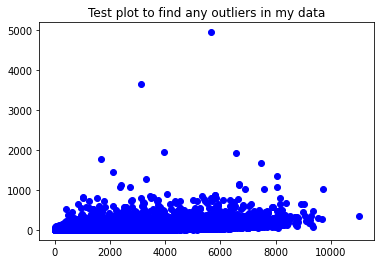

In [15]:
# I am not going to combine two data frames and goingto directly compare the two 
# Doing a test plot with my road racing data to see where it's at. 

plt.scatter(road['IRATING'], road['WINS'], color='b')
plt.title('Test plot to find any outliers in my data')
plt.show()

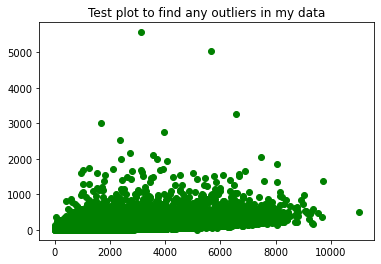

In [16]:
# Making another graph to get a deeper understanding of my data

plt.scatter(road['IRATING'], road['TOP25PCNT'], color='g')
plt.title('Test plot to find any outliers in my data')
plt.show()

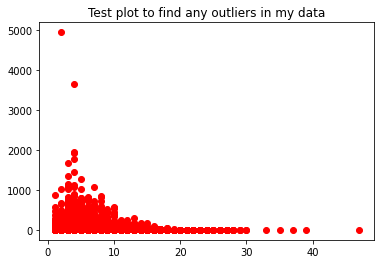

In [17]:
plt.scatter(road['AVG_START_POS'], road['WINS'], color='r')
plt.title('Test plot to find any outliers in my data')
plt.show()

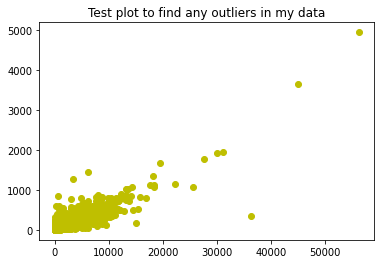

In [18]:
plt.scatter(road['LAPSLEAD'], road['WINS'], color='y')
plt.title('Test plot to find any outliers in my data')
plt.show()

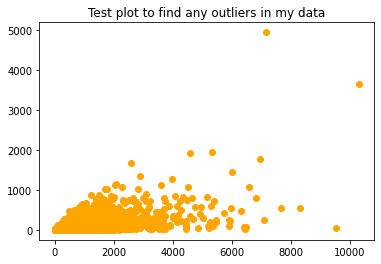

In [19]:
# This graph was going to be my main graph with the others being my supporting data
# 
plt.scatter(road['STARTS'], road['WINS'], color='orange')
plt.title('Test plot to find any outliers in my data')
plt.show()

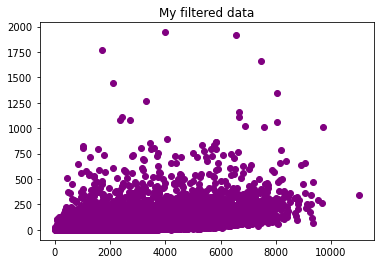

In [20]:
# I do have some outliers in my dataset and I'm going to filter the extreme examples out to get a better view of my dataframe
# I'm going to do a test filter to make sure my filter works as I want it to. 
road_filter = road.query('WINS < 2300 and IRATING > 1')
plt.scatter(road_filter['IRATING'], road_filter['WINS'], color='purple')
plt.title('My filtered data')
plt.show()

In [21]:
# Now I want to see the difference in size of the two dataframes

print(road_filter.size)
print(road.size)

2524242
4016572


In [22]:
# Now looking at the head and tail of my filtered dataframe

road_filter.head()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,CLASS,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
0,602,347,3,5,168,495,17820,8034,7.83,P 3.45,11017.0,2026.0,8159,101393
1,1695,1015,3,3,117,1375,24488,13248,2.93,A 4.44,9721.0,2062.0,20039,197714
2,487,263,4,4,122,377,18454,9137,6.41,P 3.29,9664.0,2491.0,4028,59224
3,713,291,4,5,134,484,16168,5987,5.08,A 3.46,9524.0,1286.0,7931,95862
4,671,475,2,3,139,584,11266,8115,2.37,A 4.99,9339.0,2842.0,9060,92948


In [23]:
road_filter.tail()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,CLASS,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
286888,275,7,8,8,15,15,2043,100,5.45,D 1.23,22.0,1184.0,13,4005
286889,179,5,7,8,15,12,1396,83,7.39,D 1.07,21.0,1350.0,23,2755
286890,2062,25,10,9,23,89,24468,171,3.83,D 2.49,15.0,1175.0,3345,46900
286892,73,0,10,11,11,1,427,1,5.30,D 2.16,8.0,1228.0,0,799
286893,277,6,12,12,17,21,2139,81,3.43,C 2.22,2.0,1316.0,400,4709


In [24]:
road_filter.describe()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
count,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000,180303.000000
mean,117.707398,9.112588,7.905908,7.975935,39.972818,26.332097,1812.323871,139.498167,5.925186,1474.155228,1331.749466,255.702401,5761.802810
std,230.389064,31.131551,2.362308,1.865127,16.427085,65.888159,3851.339648,496.673880,1.863758,761.810790,141.157631,911.086741,14167.640476
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,0.000000,0.000000
25%,19.000000,0.000000,6.000000,7.000000,30.000000,2.000000,223.000000,3.000000,4.710000,1098.000000,1276.000000,0.000000,613.000000
50%,48.000000,2.000000,8.000000,8.000000,37.000000,8.000000,600.000000,30.000000,5.860000,1326.000000,1350.000000,19.000000,1663.000000
75%,122.000000,7.000000,9.000000,9.000000,47.000000,24.000000,1731.000000,104.000000,7.060000,1616.000000,1350.000000,137.000000,4933.000000
max,9549.000000,1944.000000,47.000000,41.000000,183.000000,3264.000000,140647.000000,36238.000000,31.500000,11017.000000,5228.000000,61004.000000,521321.000000


In [25]:
road.describe()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
count,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,286898.000000,180308.000000,180308.000000,286898.000000,286898.000000
mean,76.054856,5.834129,7.915646,8.324694,32.343802,16.771170,1156.230183,89.214041,6.622716,1474.163104,1331.755879,161.047592,3668.049669
std,192.030770,27.548337,2.522392,2.298088,18.949005,55.501306,3194.043882,421.292693,3.654606,761.897980,141.169158,742.659455,11741.827893
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,4.000000,0.000000,6.000000,7.000000,20.000000,0.000000,33.000000,0.000000,4.670000,1098.000000,1276.000000,0.000000,87.000000
50%,18.000000,0.000000,8.000000,8.000000,32.000000,2.000000,199.000000,5.000000,6.150000,1326.000000,1350.000000,0.000000,544.000000
75%,69.000000,4.000000,9.000000,10.000000,42.000000,13.000000,900.000000,52.000000,8.000000,1616.000000,1350.000000,43.000000,2495.000000
max,10309.000000,4939.000000,47.000000,42.000000,183.000000,5561.000000,152004.000000,56269.000000,148.000000,11017.000000,5228.000000,61004.000000,790152.000000


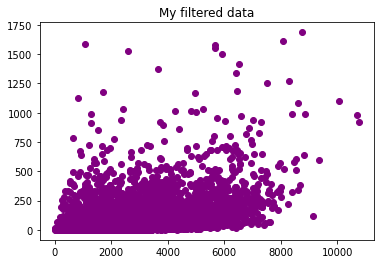

In [26]:
# Plotting the filtered data
plt.scatter(oval['IRATING'], oval['WINS'], color='purple')
plt.title('My filtered data')
plt.show()

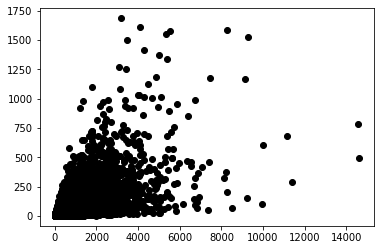

In [27]:
# Now messing around with my oval racing dataframe
# Doing my main graph to see if there's any anomolies

plt.scatter(oval['STARTS'], oval['WINS'], color='black')


In [28]:
# Now this tells a more clear story compared to the road racers. 
# I'm going to check for nulls now 

oval.isnull().sum()

STARTS                 0
WINS                   0
AVG_START_POS          0
AVG_FINISH_POS         0
AVG_POINTS             0
TOP25PCNT              0
LAPS                   0
LAPSLEAD               0
AVG_INC                0
CLASS                  0
IRATING           110105
TTRATING          110105
TOT_CLUBPOINTS         0
CHAMPPOINTS            0
dtype: int64

In [29]:
# Now making a test filter that will elimate all the nulls from my dataframe. 
oval_filter = oval.query('IRATING > 1')

In [30]:
# Checking for nulls once more 

oval_filter.isnull().sum()

STARTS            0
WINS              0
AVG_START_POS     0
AVG_FINISH_POS    0
AVG_POINTS        0
TOP25PCNT         0
LAPS              0
LAPSLEAD          0
AVG_INC           0
CLASS             0
IRATING           0
TTRATING          0
TOT_CLUBPOINTS    0
CHAMPPOINTS       0
dtype: int64

In [31]:
# Now I know all the nulls have been eliminated, it's time to apply it to my dataframe
oval = oval.query('IRATING > 1')

In [32]:
# Looking at the statistics of my oval dataframe 
oval.describe()

,STARTS,WINS,AVG_START_POS,AVG_FINISH_POS,AVG_POINTS,TOP25PCNT,LAPS,LAPSLEAD,AVG_INC,IRATING,TTRATING,TOT_CLUBPOINTS,CHAMPPOINTS
count,127714.000000,127714.000000,127714.000000,127714.000000,127714.000000,127714.000000,127714.000000,127714.000000,127714.000000,127714.000000,127714.000000,127714.000000,1.277140e+05
mean,162.327928,10.392228,8.860822,8.674311,42.528274,37.200542,6367.879904,478.970614,4.317499,1505.142435,1306.374125,394.218081,8.393732e+03
std,364.439186,39.100412,2.444615,1.690340,15.363017,103.352707,16639.428153,1976.777174,1.451050,704.699961,106.917990,1385.330325,2.415459e+04
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,106.000000,0.000000,0.000000e+00
25%,22.000000,0.000000,7.000000,8.000000,33.000000,4.000000,567.000000,9.000000,3.350000,1149.000000,1268.000000,0.000000,8.190000e+02
50%,54.500000,2.000000,9.000000,9.000000,40.000000,10.000000,1564.000000,64.000000,4.180000,1381.000000,1339.000000,23.000000,2.058000e+03
75%,146.000000,7.000000,10.000000,10.000000,49.000000,29.000000,4877.000000,262.000000,5.140000,1659.000000,1350.000000,191.000000,5.900000e+03
max,14614.000000,1687.000000,24.000000,39.000000,206.000000,4377.000000,499270.000000,84890.000000,27.000000,10772.000000,3346.000000,45213.000000,1.050301e+06


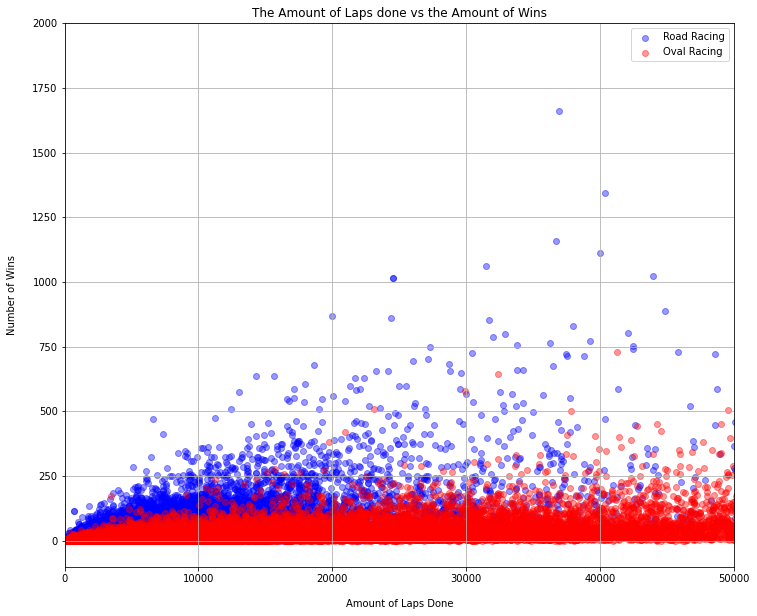

In [63]:
# Making my first real visualization for comparison of  the amount of Laps and wins. 

fig, ax = plt.subplots(figsize=(12, 10))
 
# Placing my points 
ax.scatter(road['LAPS'], road['WINS'], color='b', alpha=.4, label='Road Racing')
ax.scatter(oval['LAPS'], oval['WINS'], color='r', alpha=.4, label='Oval Racing')

# Setting my labels and title.
ax.set_xlabel('Amount of Laps Done', labelpad=15)
ax.set_ylabel('Number of Wins', labelpad=15)
ax.set_title('The Amount of Laps done vs the Amount of Wins')

# Setting my limits
ax.set_xlim(0,50000)
ax.set_ylim(-100,2000)

# Turning the grid on
ax.grid('on')

# Adding a legend
leg = ax.legend(fancybox=True);

plt.show()

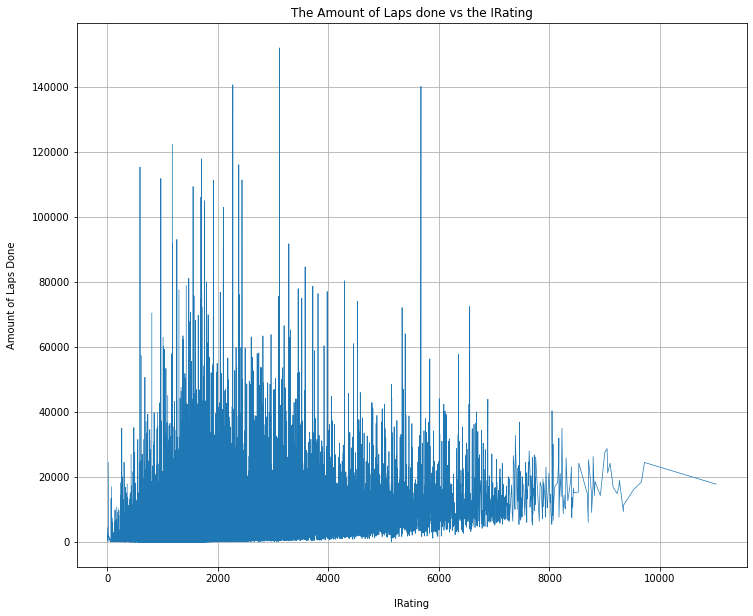

In [59]:
# My second visulation, line plot that will better show the relationship between the IRating and amount of laps 

fig, ax = plt.subplots()

# Making my line plot
road.set_index('IRATING')['LAPS'].plot(figsize=(12, 10), linewidth=.7)

# Setting my labels and title
ax.set_xlabel('IRating', labelpad=15)
ax.set_ylabel('Amount of Laps Done', labelpad=15)
ax.set_title('The Amount of Laps done vs the IRating')

# Adding a grid
ax.grid('on')

plt.show()

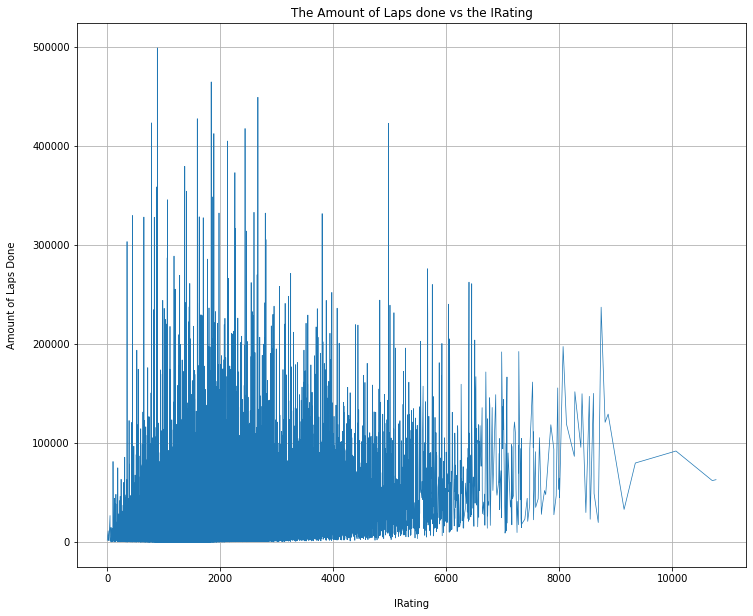

In [65]:
# This graph represents the laps vs IRating but for oval racers
fig, ax = plt.subplots()
oval.set_index('IRATING')['LAPS'].plot(figsize=(12, 10), linewidth=.7)

# Setting my labels and title
ax.set_xlabel('IRating', labelpad=15)
ax.set_ylabel('Amount of Laps Done', labelpad=15)
ax.set_title('The Amount of Laps done vs the IRating')

# Adding a grid
ax.grid('on')

plt.show()

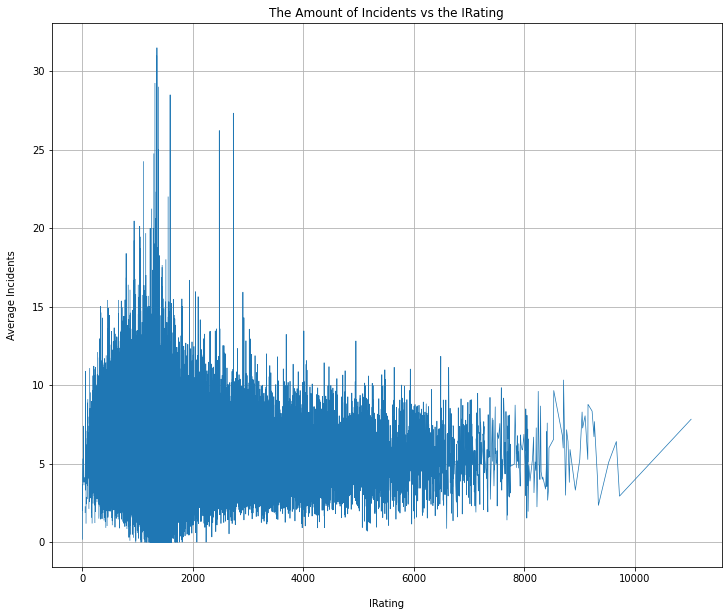

In [67]:
# This graph is comparing the drivers skill level to how often they crash/go out of track per race
fig, ax = plt.subplots()

# Graphing my points
road.set_index('IRATING')['AVG_INC'].plot(figsize=(12, 10), linewidth=.7)

# Setting titles and labels
ax.set_xlabel('IRating', labelpad=15)
ax.set_ylabel('Average Incidents', labelpad=15)
ax.set_title('The Amount of Incidents vs the IRating')

# Turning the grid on
ax.grid('on')

plt.show()

In [36]:
# Exporting my road dataframe to be used

road.to_csv('Road_driver_stats.csv')